# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

#### The dataset is related to 17 marketing campaings that occurred between May 2008 and November 2010.

### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [183]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.compose import make_column_transformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, classification_report,confusion_matrix, plot_confusion_matrix
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn import set_config
set_config(display = 'diagram')
import warnings
warnings.filterwarnings("ignore")
import time

In [2]:
df = pd.read_csv('data/bank-additional-full.csv', sep = ';')

In [3]:
#Make a copy of the original data
orig_df = df.copy()

In [4]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



In [5]:
df.shape

(41188, 21)

In [6]:
# Missing Values check
df.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [7]:
#Check for duplicates
sum(df.duplicated())

12

In [8]:
#Drop duplicates
df = df.drop_duplicates()

In [9]:
df.shape

(41176, 21)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41176 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41176 non-null  int64  
 1   job             41176 non-null  object 
 2   marital         41176 non-null  object 
 3   education       41176 non-null  object 
 4   default         41176 non-null  object 
 5   housing         41176 non-null  object 
 6   loan            41176 non-null  object 
 7   contact         41176 non-null  object 
 8   month           41176 non-null  object 
 9   day_of_week     41176 non-null  object 
 10  duration        41176 non-null  int64  
 11  campaign        41176 non-null  int64  
 12  pdays           41176 non-null  int64  
 13  previous        41176 non-null  int64  
 14  poutcome        41176 non-null  object 
 15  emp.var.rate    41176 non-null  float64
 16  cons.price.idx  41176 non-null  float64
 17  cons.conf.idx   41176 non-null 

In [11]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41176.00000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000
mean,40.02380,258.315815,2.567879,962.464810,0.173013,0.081922,93.575720,-40.502863,3.621293,5167.034870
std,10.42068,259.305321,2.770318,186.937102,0.494964,1.570883,0.578839,4.627860,1.734437,72.251364
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [12]:
df.describe(include = 'object')

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,41176,41176,41176,41176,41176,41176,41176,41176,41176,41176,41176
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,10419,24921,12164,32577,21571,33938,26135,13767,8618,35551,36537


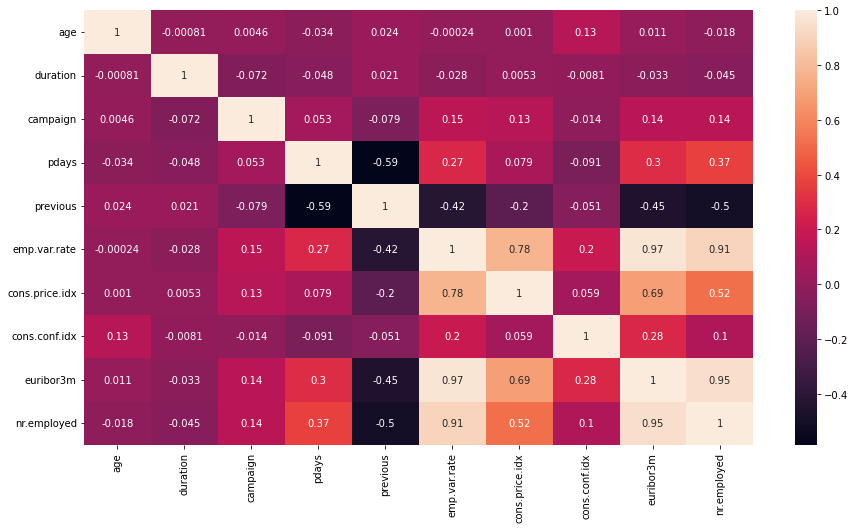

In [13]:
plt.figure(figsize = (15,8))
sns.heatmap(df.corr(), annot = True);

In [14]:
#drop highly correlated columns to avoid multicollinearity
df = df.drop(['euribor3m','emp.var.rate'], axis = 1)

In [331]:
df['age'].value_counts(normalize = True)

31    0.047439
33    0.044753
32    0.044500
36    0.043030
35    0.042776
        ...   
98    0.000051
89    0.000051
87    0.000025
94    0.000025
95    0.000025
Name: age, Length: 78, dtype: float64

In [16]:
df['job'].value_counts(normalize = True)

admin.           0.253036
blue-collar      0.224718
technician       0.163663
services         0.096343
management       0.071012
retired          0.041723
entrepreneur     0.035360
self-employed    0.034510
housemaid        0.025743
unemployed       0.024626
student          0.021250
unknown          0.008014
Name: job, dtype: float64

In [17]:
df['marital'].value_counts()    

married     24921
single      11564
divorced     4611
unknown        80
Name: marital, dtype: int64

In [18]:
df['education'].value_counts()

university.degree      12164
high.school             9512
basic.9y                6045
professional.course     5240
basic.4y                4176
basic.6y                2291
unknown                 1730
illiterate                18
Name: education, dtype: int64

In [19]:
df['default'].value_counts(normalize = True)

no         0.791165
unknown    0.208762
yes        0.000073
Name: default, dtype: float64

In [20]:
df['housing'].value_counts()

yes        21571
no         18615
unknown      990
Name: housing, dtype: int64

In [21]:
df['loan'].value_counts()

no         33938
yes         6248
unknown      990
Name: loan, dtype: int64

In [22]:
df['contact'].value_counts()

cellular     26135
telephone    15041
Name: contact, dtype: int64

In [23]:
df['y'].value_counts(normalize = True)

no     0.887337
yes    0.112663
Name: y, dtype: float64

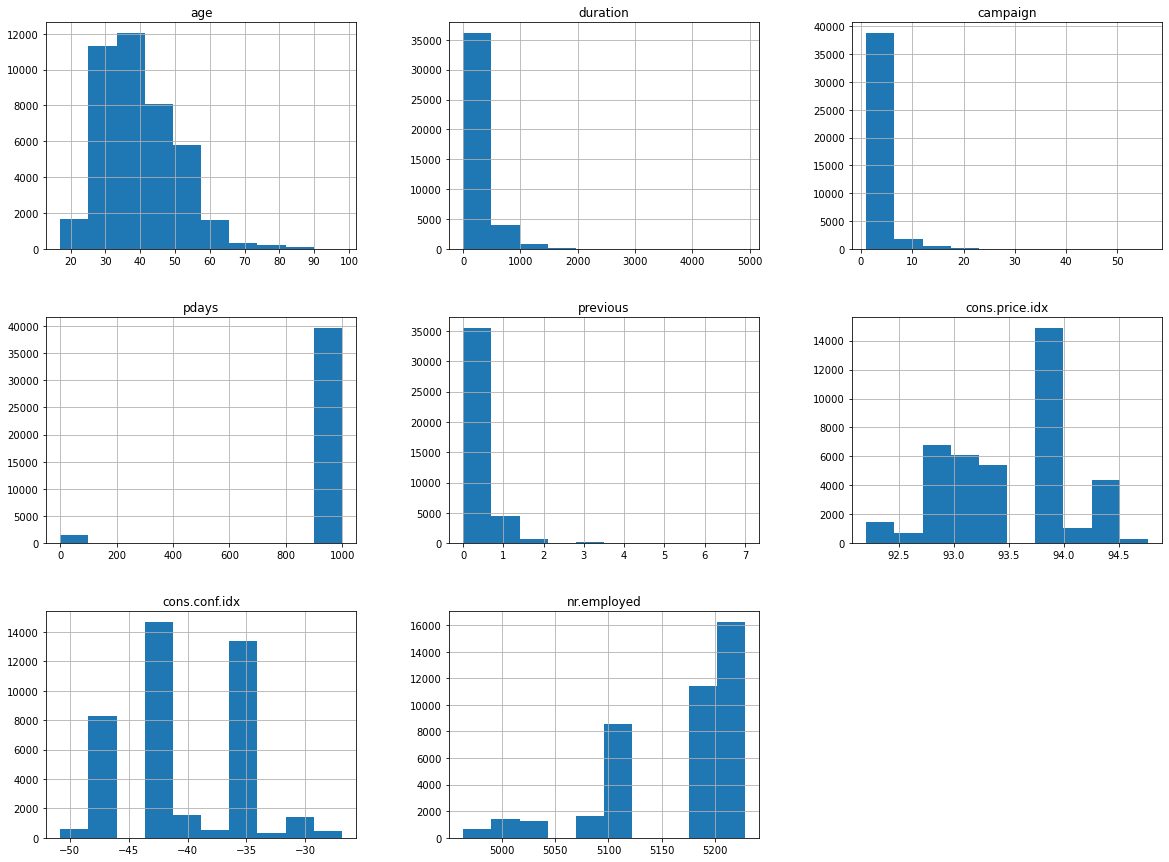

In [24]:
df.hist(figsize = (20,15));

In [26]:
df.describe()

,age,duration,campaign,pdays,previous,cons.price.idx,cons.conf.idx,nr.employed
count,41176.00000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000
mean,40.02380,258.315815,2.567879,962.464810,0.173013,93.575720,-40.502863,5167.034870
std,10.42068,259.305321,2.770318,186.937102,0.494964,0.578839,4.627860,72.251364
min,17.00000,0.000000,1.000000,0.000000,0.000000,92.201000,-50.800000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,93.075000,-42.700000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,93.749000,-41.800000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,93.994000,-36.400000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,94.767000,-26.900000,5228.100000


In [27]:
num_columns = df.select_dtypes(['int', 'float']).columns.tolist()
num_columns

['age',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'cons.price.idx',
 'cons.conf.idx',
 'nr.employed']

In [28]:
cat_columns = df.select_dtypes('object').columns.tolist()
cat_columns

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome',
 'y']

#### Outlier Treatment

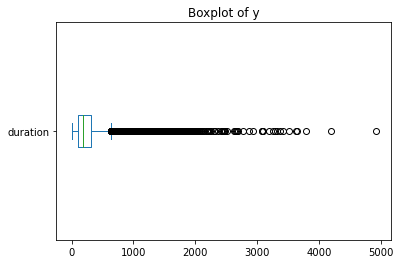

In [29]:
df['duration'].plot(kind = 'box', vert = False, title = "Boxplot of y");

In [30]:
df_zscore = df[np.abs(stats.zscore(df['duration'])) < 3].copy()

In [31]:
df_zscore.shape

(40315, 19)

In [32]:
iqr_data_lost = 1-(df_zscore.shape[0]/df.shape[0])
print("We lost {:.2%} of the data by the z-score method".format(iqr_data_lost))

We lost 2.09% of the data by the z-score method


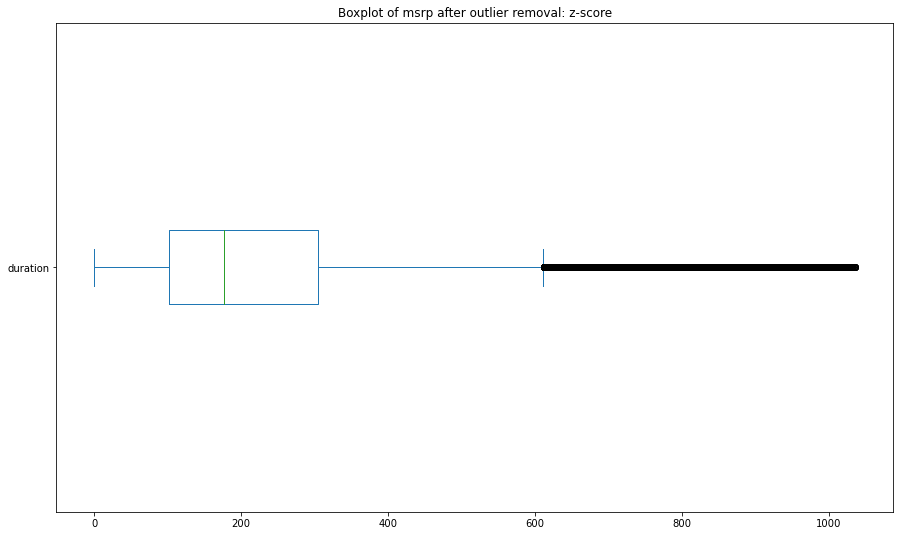

In [33]:
df_zscore['duration'].plot(kind = 'box', vert = False, title = "Boxplot of msrp after outlier removal: z-score", figsize = (15,9));

In [34]:
df = df_zscore

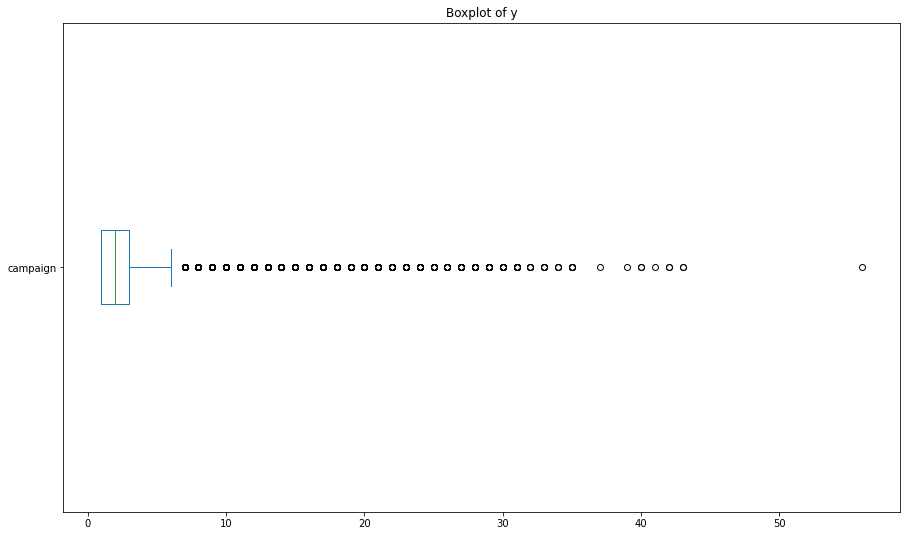

In [35]:
df['campaign'].plot(kind = 'box', vert = False, title = "Boxplot of y", figsize = (15,9));

In [36]:
df_zscore = df[np.abs(stats.zscore(df['campaign'])) < 3].copy()

In [37]:
df_zscore.shape

(39461, 19)

In [38]:
iqr_data_lost = 1-(df_zscore.shape[0]/df.shape[0])
print("We lost {:.2%} of the data by the z-score method".format(iqr_data_lost))

We lost 2.12% of the data by the z-score method


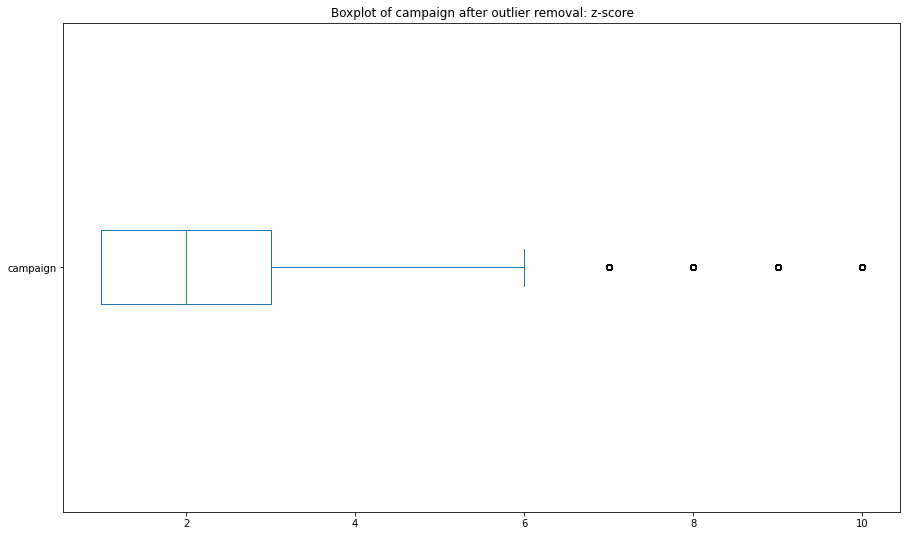

In [39]:
df_zscore['campaign'].plot(kind = 'box', vert = False, title = "Boxplot of campaign after outlier removal: z-score", figsize = (15,9));

In [40]:
df = df_zscore
df_wo_outliers = df.copy()

### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

#### Business Objective: To identify the major factors that can affect success of a contact (i.e. the client subscribes the deposit). By doing so, we can then increase campaign efficiency by using the available resources towards the contacts that are most likely to result in success. 

### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features (columns 1 - 7), prepare the features and target column for modeling with appropriate encoding and transformations.

In [41]:
#convert target column from non-numeric values to numeric values
df['y'] = df['y'].map({'yes':1 ,'no':0})

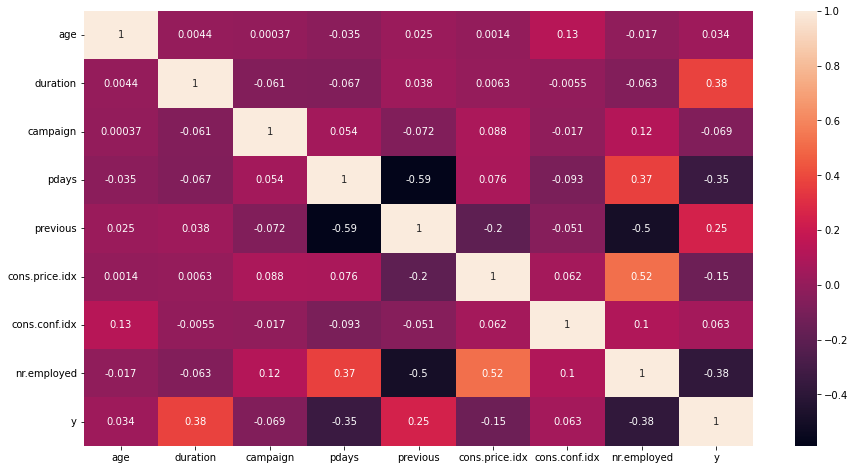

In [164]:
plt.figure(figsize = (15,8))
sns.heatmap(df.corr(), annot = True);

<AxesSubplot:xlabel='job'>

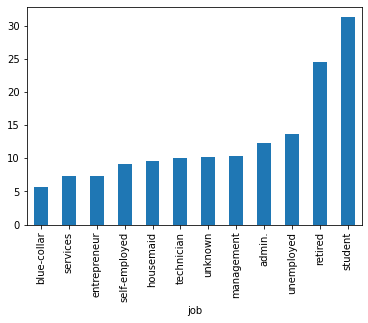

In [42]:
df.groupby('job')['y'].mean().round(3).multiply(100).sort_values().plot(kind = 'bar')

<AxesSubplot:xlabel='nr.employed'>

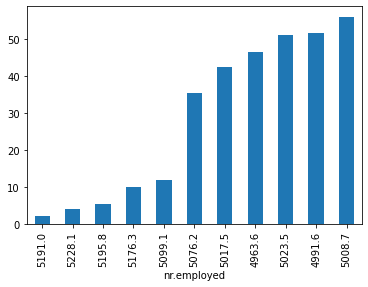

In [166]:
df.groupby('nr.employed')['y'].mean().round(3).multiply(100).sort_values().plot(kind = 'bar')

<AxesSubplot:xlabel='pdays'>

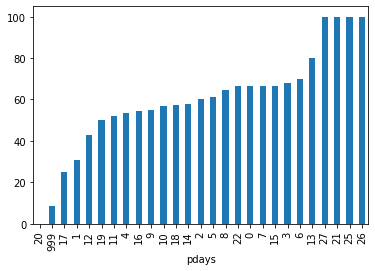

In [168]:
df.groupby('pdays')['y'].mean().round(3).multiply(100).sort_values().plot(kind = 'bar')

<AxesSubplot:xlabel='age'>

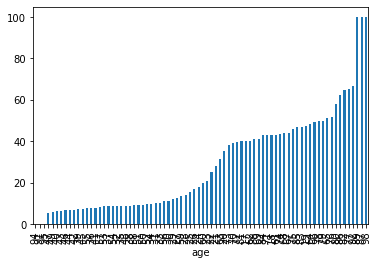

In [330]:
df.groupby('age')['y'].mean().round(3).multiply(100).sort_values().plot(kind = 'bar')

#### Train/Test Split

In [44]:
X = df[num_columns]
y = df.y

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state = 42)

In [46]:
print(X_train.shape)
print(X_test.shape)

print("=" * 50)

print(y_train.shape)
print(y_test.shape)

(27622, 8)
(11839, 8)
(27622,)
(11839,)


#### Scaling

In [47]:
scaler = StandardScaler()

In [48]:
X_train_scaled = scaler.fit_transform(X_train[num_columns])
X_test_scaled = scaler.transform(X_test[num_columns])

In [49]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns = X.columns)

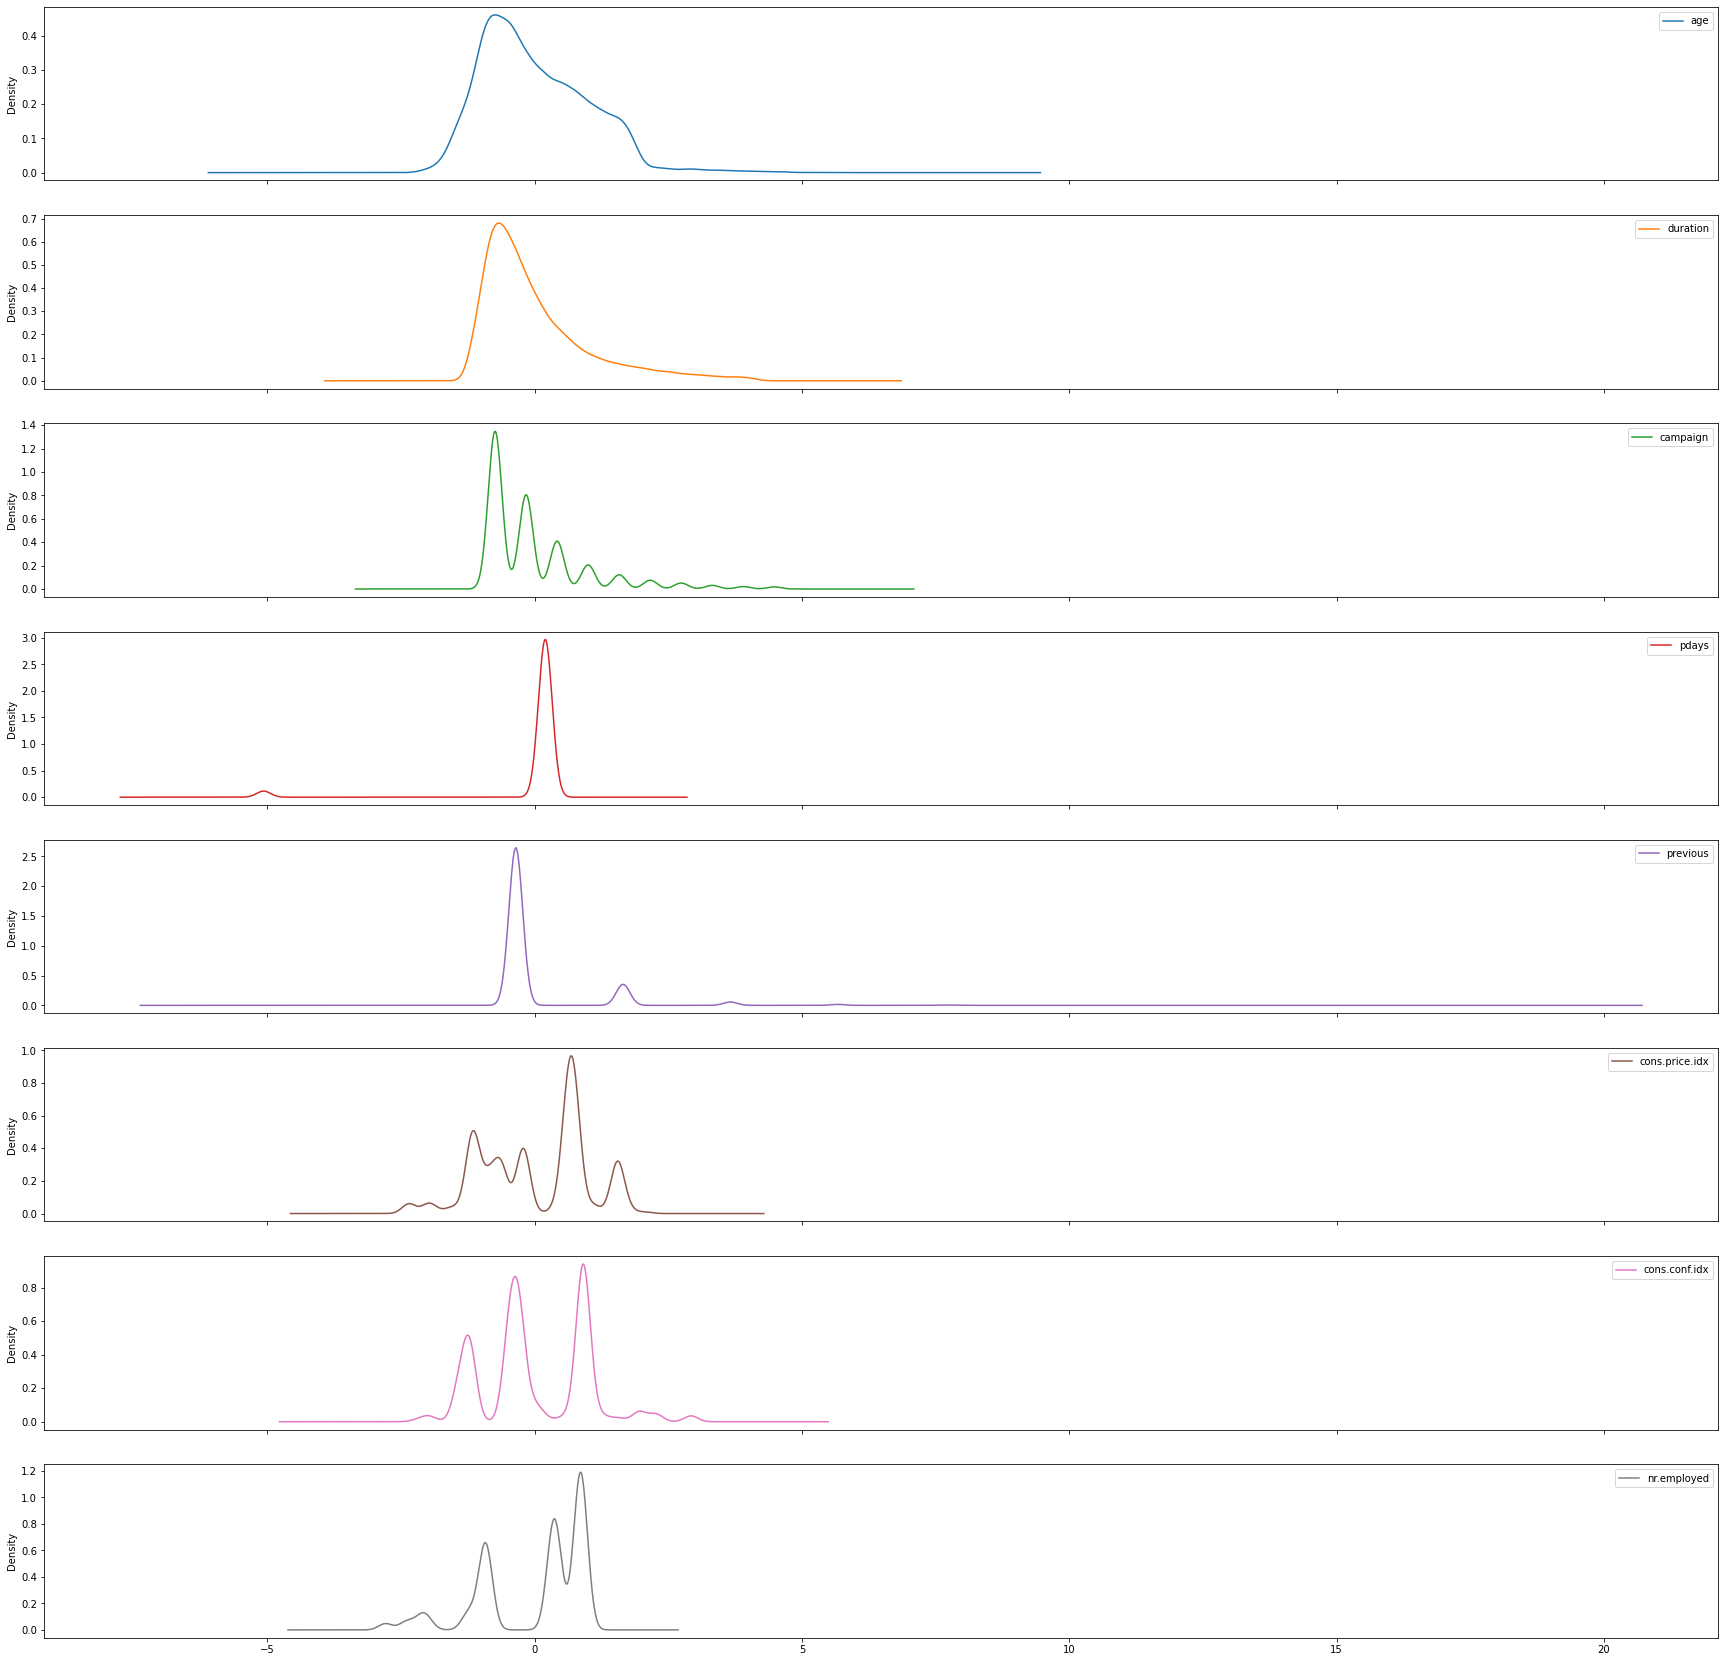

In [50]:
X_train_scaled.plot(kind = 'kde', subplots = True, figsize = (30, 30));

In [128]:
print(X_train_scaled.head())


        age  duration  campaign     pdays  previous  cons.price.idx  \
0 -0.965821 -0.871294 -0.742205  0.197203 -0.354735       -0.846870   
1 -1.350130  1.053987 -0.742205  0.197203 -0.354735        0.607471   
2  0.283185 -0.683969 -0.742205  0.197203  1.651918       -0.846870   
3  0.475340  0.153788 -0.161994  0.197203 -0.354735       -0.210272   
4 -0.485434  0.923901 -0.161994  0.197203  1.651918       -1.160856   

   cons.conf.idx  nr.employed  
0      -1.415151    -0.922398  
1      -0.470371     0.857593  
2      -1.415151    -0.922398  
3       0.946799     0.857593  
4      -1.221901    -0.922398  


#### One Hot Encoding

In [131]:
#Encode categorical columns
X_cat_encoded = pd.get_dummies(df[['job','marital', 'education','default', 'housing', 'loan']], drop_first = True)


In [132]:
print(X_cat_encoded.shape)
print(X_cat_encoded.info())

(39461, 27)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 39461 entries, 0 to 41187
Data columns (total 27 columns):
 #   Column                         Non-Null Count  Dtype
---  ------                         --------------  -----
 0   job_blue-collar                39461 non-null  uint8
 1   job_entrepreneur               39461 non-null  uint8
 2   job_housemaid                  39461 non-null  uint8
 3   job_management                 39461 non-null  uint8
 4   job_retired                    39461 non-null  uint8
 5   job_self-employed              39461 non-null  uint8
 6   job_services                   39461 non-null  uint8
 7   job_student                    39461 non-null  uint8
 8   job_technician                 39461 non-null  uint8
 9   job_unemployed                 39461 non-null  uint8
 10  job_unknown                    39461 non-null  uint8
 11  marital_married                39461 non-null  uint8
 12  marital_single                 39461 non-null  uint8
 13  mari

In [133]:
X_cat_encoded

,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,...,education_illiterate,education_professional.course,education_university.degree,education_unknown,default_unknown,default_yes,housing_unknown,housing_yes,loan_unknown,loan_yes
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
41184,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
41185,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
41186,0,0,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0


### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

#### This was done above, before the scaling 

### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

In [54]:
#DummyClassifier
#Create and fit the model
dummy = DummyClassifier().fit(X_train_scaled, y_train)


# coefficient of determination R^2 of the model (a.k.a. how well the model describes thte data)
baseline = dummy.score(X_train_scaled, y_train)
baseline_test = dummy.score(X_test_scaled, y_test)

# Predictions on test 
print("Training score is {:.2f}".format(baseline))
print("Test score is {:.2f}".format(baseline_test))

# rmse
dummy_pred = dummy.predict(X_test_scaled)
baseline_rmse = mean_squared_error(y_test, dummy_pred, squared = False)
print("The value of dummy rmse is {:.2f}".format(baseline_rmse))

Training score is 0.90
Test score is 0.90
The value of dummy rmse is 0.32


### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

In [249]:
logparams={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}

In [250]:
logreg = GridSearchCV(LogisticRegression(), param_grid = logparams).fit(X_train_scaled, y_train)
print(logreg.best_score_)
print(logreg.best_params_)

0.9163708900036369
{'C': 10.0, 'penalty': 'l2'}


In [251]:
%%time
log_model = LogisticRegression(penalty = 'l2', C = 10.0)
start = time.time()
log_model.fit(X_train_scaled, y_train)
stop = time.time()
log_train_time = stop - start
log_pred = log_model.predict(X_test_scaled)

CPU times: user 49.7 ms, sys: 3.02 ms, total: 52.7 ms
Wall time: 32.9 ms


### Problem 9: Score the Model

What is the accuracy of your model?

#### Since we have an imbalanced dataset, accuracy may not be the best evaluation metric for our model. Also we want to minimize our false positives (i.e. we expect a positive outcome but in reality we get a negative outcome). We will also look at the confusion matrix and precision as alternative metrics.

In [252]:
print(f'Training time: {log_train_time: .3f}s')
print('Training Score: {:.2f}'.format(logreg.score(X_train_scaled, y_train)))
print('Test Score: {:.2f}'.format( logreg.score(X_test_scaled, y_test)))
print('Logistic Regression rmse: {:.2f}'.format(mean_squared_error(y_test, logreg.predict(X_test_scaled), squared = False)))
print('--------------------------------------------------------')
print(classification_report(y_test, log_pred))
print('--------------------------------------------------------')
print('Precision Score: {:.2f}'.format(precision_score(y_test, log_pred,average = 'binary')))

Training time:  0.032s
Training Score: 0.92
Test Score: 0.92
Logistic Regression rmse: 0.29
--------------------------------------------------------
              precision    recall  f1-score   support

           0       0.93      0.98      0.95     10612
           1       0.67      0.39      0.50      1227

    accuracy                           0.92     11839
   macro avg       0.80      0.69      0.72     11839
weighted avg       0.91      0.92      0.91     11839

--------------------------------------------------------
Precision Score: 0.67


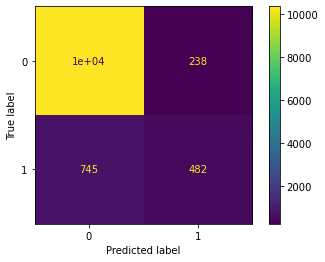

In [253]:
confusion_mat = plot_confusion_matrix(log_model,X_test_scaled, y_test)
confusion_mat

### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

#### KNN Algorithm

In [254]:
knnparams = {'n_neighbors': [9,10,11,12]}

In [255]:
knn_grid = GridSearchCV(KNeighborsClassifier(), param_grid = knnparams).fit(X_train_scaled, y_train)
best_k = list(knn_grid.best_params_.values())
best_acc = knn_grid.score(X_test_scaled, y_test)
knn_train_acc = knn_grid.score(X_train_scaled, y_train)
knn_test_acc = knn_grid.score(X_test_scaled, y_test)
best_params = knn_grid.best_params_
print(best_acc)

print (f'Best Parameters: {best_params}')
print (f'Training Accuracy: {knn_train_acc: .2f}')
print (f'Test Accuracy: {knn_test_acc: .2f}')

0.9158712729115634
Best Parameters: {'n_neighbors': 11}
Training Accuracy:  0.93
Test Accuracy:  0.92


In [256]:
%%time
knn_model = KNeighborsClassifier(n_neighbors = 11)
start = time.time()
knn_model.fit(X_train_scaled, y_train)
stop = time.time()
knn_train_time = stop - start
knn_pred = knn_model.predict(X_test_scaled)
print(f'Test Accuracy: {knn_model.score(X_test_scaled, y_test): .2f}')
print(f'Training time: {knn_train_time: .3f}s')
print('Precision Score: {:.2f}'.format(precision_score(y_test, knn_pred, average = 'binary')))
print('--------------------------------------------------------')
print(classification_report(y_test, knn_pred))
print('--------------------------------------------------------')

Test Accuracy:  0.92
Training time:  0.024s
Precision Score: 0.63
--------------------------------------------------------
              precision    recall  f1-score   support

           0       0.94      0.97      0.95     10612
           1       0.63      0.45      0.53      1227

    accuracy                           0.92     11839
   macro avg       0.79      0.71      0.74     11839
weighted avg       0.91      0.92      0.91     11839

--------------------------------------------------------
CPU times: user 1.35 s, sys: 7.72 ms, total: 1.36 s
Wall time: 1.39 s


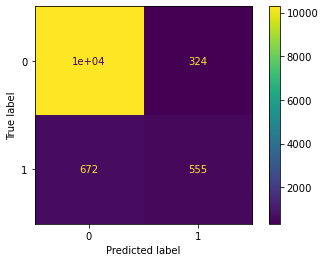

In [257]:
confusion_mat = plot_confusion_matrix(knn_model,X_test_scaled, y_test)
confusion_mat

#### Decision Tree

In [258]:
treeparams = {'min_impurity_decrease': [.01, .02, .03, .05, 1.0],
         'max_depth': [2,3,4,5,6]}

In [259]:
#Use GridSearchCV to determine best depth
grid = GridSearchCV(DecisionTreeClassifier(), param_grid = treeparams).fit(X_train_scaled, y_train)
grid_train_acc = grid.score(X_train_scaled, y_train)
grid_test_acc = grid.score(X_test_scaled, y_test)
best_params = grid.best_params_
best_acc = grid.score(X_test_scaled, y_test)
results = pd.DataFrame(grid.predict(X_test_scaled))
print(best_acc)

print (f'Best Parameters: {best_params}')
print (f'Training Accuracy: {grid_train_acc: .2f}')
print (f'Test Accuracy: {grid_test_acc: .2f}')

0.9102964777430527
Best Parameters: {'max_depth': 2, 'min_impurity_decrease': 0.01}
Training Accuracy:  0.91
Test Accuracy:  0.91


In [260]:
%%time
tree_model = DecisionTreeClassifier(max_depth = 2, min_impurity_decrease = .01)
start = time.time()
tree_model.fit(X_train_scaled, y_train)
stop = time.time()
tree_train_time = stop - start
tree_pred = tree_model.predict(X_test_scaled)
print(f'Test Accuracy: {tree_model.score(X_test_scaled, y_test): .2f}')
print(f'Training time: {tree_train_time: .3f}s')
print('Precision Score: {:.2f}'.format(precision_score(y_test, tree_pred, average = 'binary')))
print('--------------------------------------------------------')
print(classification_report(y_test, tree_pred))
print('--------------------------------------------------------')

Test Accuracy:  0.91
Training time:  0.023s
Precision Score: 0.59
--------------------------------------------------------
              precision    recall  f1-score   support

           0       0.94      0.96      0.95     10612
           1       0.59      0.45      0.51      1227

    accuracy                           0.91     11839
   macro avg       0.76      0.71      0.73     11839
weighted avg       0.90      0.91      0.91     11839

--------------------------------------------------------
CPU times: user 51 ms, sys: 2.21 ms, total: 53.3 ms
Wall time: 58.1 ms


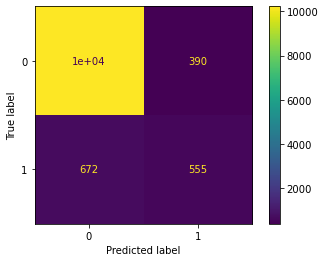

In [261]:
confusion_mat = plot_confusion_matrix(tree_model,X_test_scaled, y_test)
confusion_mat

#### SVM 

In [262]:
#running a Grid Search on for SVC takes a long time. So just used default settings instead.
svc_model = SVC()
start = time.time()
svc_model.fit(X_train_scaled, y_train)
stop = time.time()
svc_train_time = stop - start
svc_pred = svc_model.predict(X_test_scaled)
svc_train_score = svc_model.score(X_train_scaled, y_train)
svc_test_score = svc_model.score(X_test_scaled, y_test)
print (f'Training Accuracy: {svc_train_score: .2f}')
print (f'Test Accuracy: {svc_test_score: .2f}')
print(f'Training time: {svc_train_time: .3f}s')
print('Precision Score: {:.2f}'.format(precision_score(y_test, svc_pred, average = 'binary')))
print('--------------------------------------------------------')
print(classification_report(y_test, tree_pred))

Training Accuracy:  0.92
Test Accuracy:  0.91
Training time:  8.986s
Precision Score: 0.67
--------------------------------------------------------
              precision    recall  f1-score   support

           0       0.94      0.96      0.95     10612
           1       0.59      0.45      0.51      1227

    accuracy                           0.91     11839
   macro avg       0.76      0.71      0.73     11839
weighted avg       0.90      0.91      0.91     11839



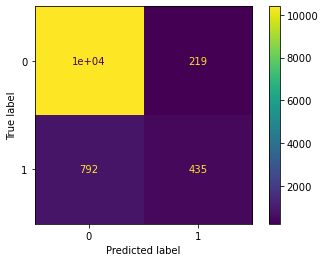

In [225]:
confusion_mat = plot_confusion_matrix(svc_model,X_test_scaled, y_test)
confusion_mat

#### Comparision Grid

In [226]:
info = [['Logistic Regression', log_train_time, 
                                log_model.score(X_train_scaled, y_train),
                                log_model.score(X_test_scaled, y_test),
                                precision_score(y_test, log_pred)],
        ['KNN', knn_train_time, 
                knn_model.score(X_train_scaled, y_train),
                knn_model.score(X_test_scaled, y_test),
                precision_score(y_test, knn_pred)],
        ['Decision Tree', tree_train_time, 
                          tree_model.score(X_train_scaled, y_train),
                          tree_model.score(X_test_scaled, y_test),
                          precision_score(y_test, tree_pred)],
        ['SVM',svc_train_time, 
               svc_train_score, 
               svc_test_score,
               precision_score(y_test, svc_pred)]]
# Create the pandas DataFrame with column name is provided explicitly
df2 = pd.DataFrame(info, 
            columns=['Model', 'Train Time', 'Train Accuracy', 'Test Accuracy', 'Precision'])
df2

,Model,Train Time,Train Accuracy,Test Accuracy,Precision
0,Logistic Regression,0.037632,0.916226,0.916969,0.669444
1,KNN,0.027217,0.927594,0.915871,0.631399
2,Decision Tree,0.022168,0.912787,0.910296,0.587302
3,SVM,10.314105,0.920534,0.914604,0.665138


### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

#### Adding categorical features

In [134]:
X_complete = pd.concat([X,X_cat_encoded], axis = 1)
X_complete

,age,duration,campaign,pdays,previous,cons.price.idx,cons.conf.idx,nr.employed,job_blue-collar,job_entrepreneur,...,education_illiterate,education_professional.course,education_university.degree,education_unknown,default_unknown,default_yes,housing_unknown,housing_yes,loan_unknown,loan_yes
0,56,261,1,999,0,93.994,-36.4,5191.0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,57,149,1,999,0,93.994,-36.4,5191.0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,37,226,1,999,0,93.994,-36.4,5191.0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,40,151,1,999,0,93.994,-36.4,5191.0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,56,307,1,999,0,93.994,-36.4,5191.0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,334,1,999,0,94.767,-50.8,4963.6,0,0,...,0,1,0,0,0,0,0,1,0,0
41184,46,383,1,999,0,94.767,-50.8,4963.6,1,0,...,0,1,0,0,0,0,0,0,0,0
41185,56,189,2,999,0,94.767,-50.8,4963.6,0,0,...,0,0,1,0,0,0,0,1,0,0
41186,44,442,1,999,0,94.767,-50.8,4963.6,0,0,...,0,1,0,0,0,0,0,0,0,0


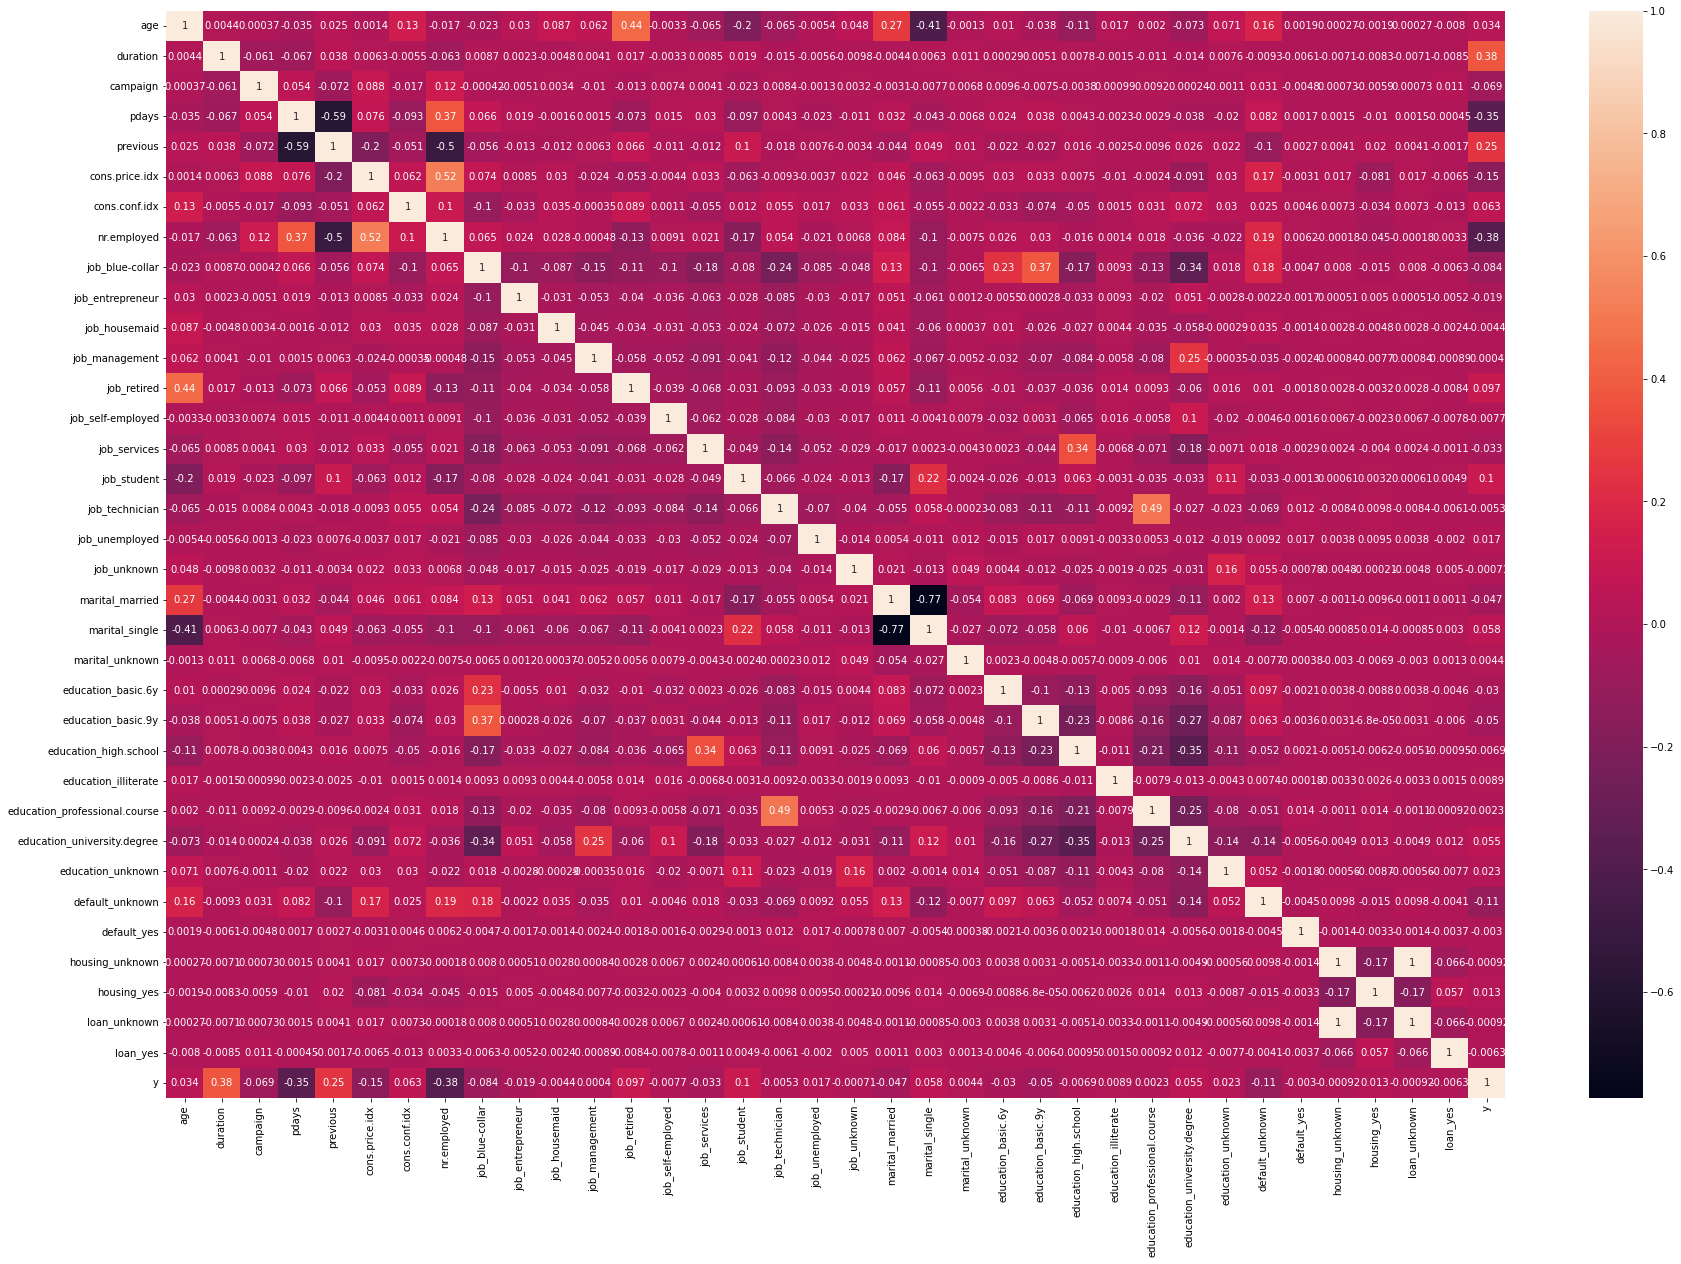

In [173]:
complete = pd.concat([X_complete, y], axis = 1)
plt.figure(figsize = (30,20))
sns.heatmap(complete.corr(), annot = True);

In [135]:
X_train_encoded, X_test_encoded, y_train_encoded, y_test_encoded = train_test_split(X_cat_encoded,y,test_size=0.3, random_state = 42)

In [136]:
print(X_train_encoded.shape)
print(X_test_encoded.shape)

print("=" * 50)

print(y_train_encoded.shape)
print(y_test_encoded.shape)

(27622, 27)
(11839, 27)
(27622,)
(11839,)


In [137]:
print(X_train_scaled.shape)
print(X_test_scaled.shape)

print("=" * 50)

print(y_train.shape)
print(y_test.shape)

(27622, 8)
(11839, 8)
(27622,)
(11839,)


In [144]:
X_train_complete = np.concatenate([X_train_scaled,X_train_encoded], axis = 1)
X_train_complete.shape

(27622, 35)

In [145]:
X_test_complete = np.concatenate([X_test_scaled,X_test_encoded], axis = 1)
X_test_complete.shape

(11839, 35)

In [202]:
#Logistic Regression model
log_model = LogisticRegression(penalty = 'l2', C = 10.0)
start = time.time()
log_model.fit(X_train_complete, y_train)
stop = time.time()
log_train_time = stop - start
log_pred = log_model.predict(X_test_complete)
print(f'Test Accuracy: {log_model.score(X_test_complete, y_test): .2f}')
print(f'Training time: {log_train_time: .3f}s')
print(print('Precision Score: {:.2f}'.format(precision_score(y_test, knn_pred))))
print('--------------------------------------------------------')
print(classification_report(y_test, log_pred))
print('--------------------------------------------------------')

Test Accuracy:  0.92
Training time:  0.274s
Precision Score: 0.63
None
--------------------------------------------------------
              precision    recall  f1-score   support

           0       0.93      0.97      0.95     10612
           1       0.65      0.41      0.50      1227

    accuracy                           0.92     11839
   macro avg       0.79      0.69      0.73     11839
weighted avg       0.90      0.92      0.91     11839

--------------------------------------------------------


In [154]:
#KNN
knn_model = KNeighborsClassifier(n_neighbors = 11)
start = time.time()
knn_model.fit(X_train_complete, y_train)
stop = time.time()
knn_train_time = stop - start
knn_pred = knn_model.predict(X_test_complete)
print(f'Test Accuracy: {knn_model.score(X_test_complete, y_test): .2f}')
print(f'Training time: {knn_train_time: .3f}s')
print(classification_report(y_test, knn_pred))

Test Accuracy:  0.91
Training time:  0.023s
              precision    recall  f1-score   support

           0       0.93      0.97      0.95     10612
           1       0.61      0.39      0.48      1227

    accuracy                           0.91     11839
   macro avg       0.77      0.68      0.71     11839
weighted avg       0.90      0.91      0.90     11839



In [155]:
#Decision Tree
tree_model = DecisionTreeClassifier(max_depth = 2, min_impurity_decrease = .01)
start = time.time()
tree_model.fit(X_train_complete, y_train)
stop = time.time()
tree_train_time = stop - start
tree_pred = tree_model.predict(X_test_complete)
print(f'Test Accuracy: {tree_model.score(X_test_complete, y_test): .2f}')
print(f'Training time: {tree_train_time: .3f}s')
print(classification_report(y_test, tree_pred))

Test Accuracy:  0.91
Training time:  0.183s
              precision    recall  f1-score   support

           0       0.94      0.96      0.95     10612
           1       0.59      0.45      0.51      1227

    accuracy                           0.91     11839
   macro avg       0.76      0.71      0.73     11839
weighted avg       0.90      0.91      0.91     11839



In [157]:
#SVM
svc_model = SVC()
start = time.time()
svc_model.fit(X_train_complete, y_train)
stop = time.time()
svc_train_time = stop - start
svc_pred = svc_model.predict(X_test_complete)
svc_train_score = svc_model.score(X_train_complete, y_train)
svc_test_score = svc_model.score(X_test_complete, y_test)
print (f'Training Accuracy: {svc_train_score: .2f}')
print (f'Test Accuracy: {svc_test_score: .2f}')
print(f'Training time: {svc_train_time: .3f}s')
print(classification_report(y_test, tree_pred))

Training Accuracy:  0.93
Test Accuracy:  0.92
Training time:  33.797s
              precision    recall  f1-score   support

           0       0.94      0.96      0.95     10612
           1       0.59      0.45      0.51      1227

    accuracy                           0.91     11839
   macro avg       0.76      0.71      0.73     11839
weighted avg       0.90      0.91      0.91     11839



#### Observation: Adding more features didn't seem to make much of an improvement. The features that are best for predicting outcome were already added to the original models.

### Logistic model
#### Adjust Grid Search default scoring method to precision

In [311]:
logreg = GridSearchCV(LogisticRegression(), param_grid = logparams, scoring = 'precision')
start = time.time()
logreg.fit(X_train_scaled, y_train)
stop = time.time()
log_train_time = stop - start
print(logreg.best_score_)
print(logreg.best_params_)
print(log_train_time)

0.7231906572416584
{'C': 0.001, 'penalty': 'l2'}
0.9115860462188721


#### Alter Decision Boundary

Accuracy Score: 0.90
Precision Score: 0.84


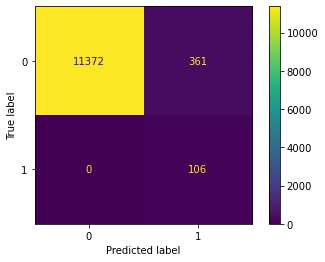

In [270]:
log_model = LogisticRegression(penalty = 'l2', C = .001).fit(X_train_scaled, y_train)
log_pred = np.where(log_model.predict_proba(X_test_scaled)[:,1] > .75,1,0)
plot_confusion_matrix(log_model,X_test_scaled, log_pred);
print('Accuracy Score: {:.2f}'.format(accuracy_score(y_test, log_pred)))
print('Precision Score: {:.2f}'.format(precision_score(y_test, log_pred, average = 'binary')));

### KNN Algorithm
#### Adjust Grid Search default scoring method to precision

In [312]:
knnreg = GridSearchCV(KNeighborsClassifier(), param_grid = knnparams, scoring = 'precision')
start = time.time()
knnreg.fit(X_train_scaled, y_train)
stop = time.time()
log_train_time = stop - start
print(knnreg.best_score_)
print(knnreg.best_params_)
print(log_train_time)

0.6544939298526415
{'n_neighbors': 12}
6.145339250564575


#### Alter Decision Boundary

Accuracy Score: 0.90
Precision Score: 0.85


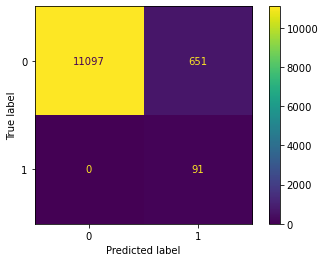

In [285]:
knn_model = KNeighborsClassifier(n_neighbors = 12).fit(X_train_scaled, y_train)
knn_pred = np.where(knn_model.predict_proba(X_test_scaled)[:,1] > .85,1,0)
plot_confusion_matrix(knn_model,X_test_scaled, knn_pred);
print('Accuracy Score: {:.2f}'.format(accuracy_score(y_test, knn_pred)))
print('Precision Score: {:.2f}'.format(precision_score(y_test, knn_pred, average = 'binary')));

### Decision Tree
#### Adjust Grid Search default scoring method to precision

In [313]:
treereg = GridSearchCV(DecisionTreeClassifier(), param_grid = treeparams, scoring = 'precision')
start = time.time()
treereg.fit(X_train_scaled, y_train)
stop = time.time()
log_train_time = stop - start
print(treereg.best_score_)
print(treereg.best_params_)
print(log_train_time)

0.6079650665755209
{'max_depth': 2, 'min_impurity_decrease': 0.01}
2.226245164871216


#### Alter Decision Boundary

Accuracy Score: 0.91
Precision Score: 0.59


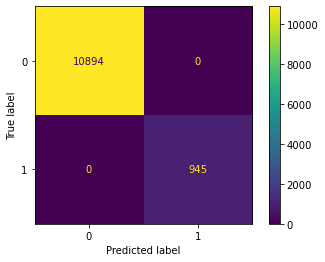

In [322]:
tree_model = DecisionTreeClassifier(max_depth = 2, min_impurity_decrease = .01).fit(X_train_scaled, y_train)
tree_pred = np.where(tree_model.predict_proba(X_test_scaled)[:,1] > .60,1,0)
plot_confusion_matrix(tree_model,X_test_scaled, tree_pred);
print('Accuracy Score: {:.2f}'.format(accuracy_score(y_test, tree_pred)))
print('Precision Score: {:.2f}'.format(precision_score(y_test, tree_pred, average = 'binary')));

### SVM
#### Alter Decision Boundary 

Accuracy Score: 0.91
Precision Score: 0.82
9.136065006256104


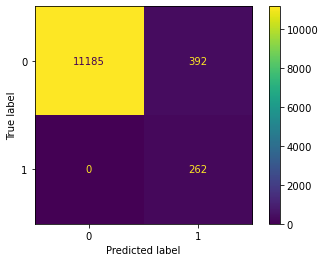

In [316]:
svc_model = SVC(probability = True).fit(X_train_scaled, y_train)
start = time.time()
#fitted twice, once to avoid predict_proba "not fitted" error, and second to count time
svc.fit(X_train_scaled, y_train)  
stop = time.time()
log_train_time = stop - start
svc_pred = np.where(svc_model.predict_proba(X_test_scaled)[:,1] > .85,1,0)
plot_confusion_matrix(svc_model,X_test_scaled, svc_pred);
print('Accuracy Score: {:.2f}'.format(accuracy_score(y_test, svc_pred)))
print('Precision Score: {:.2f}'.format(precision_score(y_test, svc_pred, average = 'binary')))
print(log_train_time)

### Comparison with new boundaries in place


In [317]:
info = [['Logistic Regression', log_train_time, 
                                accuracy_score(y_test, log_pred),
                                precision_score(y_test, log_pred, average = 'binary')],
        ['KNN', knn_train_time, 
                accuracy_score(y_test, knn_pred),
                precision_score(y_test, knn_pred, average = 'binary')],
        ['Decision Tree', tree_train_time, 
                          accuracy_score(y_test, tree_pred),
                          precision_score(y_test, tree_pred, average = 'binary')],
        ['SVM',svc_train_time, 
               accuracy_score(y_test, svc_pred),
               precision_score(y_test, svc_pred, average = 'binary')]]
# Create the pandas DataFrame with column name is provided explicitly
df3 = pd.DataFrame(info, 
            columns=['Model', 'Train Time','Test Accuracy', 'Test Precision'])
df3

,Model,Train Time,Test Accuracy,Test Precision
0,Logistic Regression,9.136065,0.902441,0.839623
1,KNN,0.024182,0.901681,0.846154
2,Decision Tree,0.022795,0.910296,0.587302
3,SVM,8.985849,0.910719,0.824427


#### Best model to use seems to be KNN with an 85% probability boundary, which yields 90% accuracy and 85% precision.

In [ ]:
#Feature importance

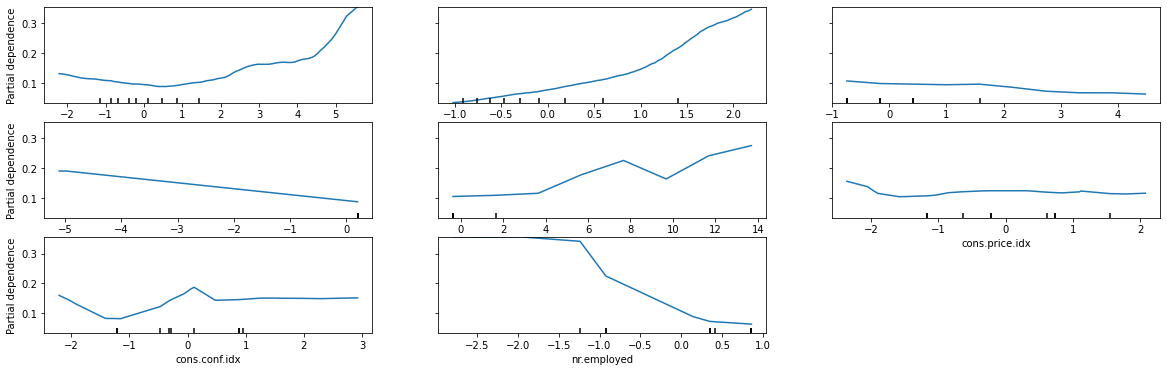

In [329]:
from sklearn.inspection import PartialDependenceDisplay, partial_dependence
fig, ax = plt.subplots(figsize = (20,6))
PartialDependenceDisplay.from_estimator(knn_model, X_train_scaled, 
                                        features = ['age','duration','campaign','pdays','previous',
                                                    'cons.price.idx','cons.conf.idx','nr.employed'], 
                                        ax = ax)

## Findings

#### Based on the correlation matrix and the partial_dependence function, the following features seems to best predict outcome:
   1. <b> nr.employed </b>: Number of employees - quarterly indicator. Number of employees employed showed a negative correlation, those with smaller number of employees are more likely to subscribe.
    
   2. <b> duration </b>: Call durations has a positive correlation, with higher call durations more likely to result in a subscription.
    
   3. <b> pdays</b> : Number of days that passed by after the client was last contacted from a previous campaign. Less days show better results. 
    
   4. <b> previous</b> : Number of contacts performed before this campaign for this client. More contacts show better results. 
    
   5. <b> age </b>: Age shows a slight positive correlation to likelihood of subscribing, with older individuals more likely to subscribe.
    

## Recommendations

Based on what factors seem to influence the most whether the client subscribes to a term deposit or not here are the top recommendations:

1. Since duration is not known before a call is performed and cannot be as easily manipulated, it is included only for information purposes.
2. Decrease elapsed number of days for contacting clients in between campaigns.
3. Increase number of contacts before campaigns for each client.
4. Clientele with less number of employees are the most likely to subscribe.

##### Questions